<a href="https://colab.research.google.com/github/jawnpaul/Mlmodels/blob/master/Testing_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import genfromtxt

import tensorflow as tf
from tensorflow import keras
import datetime as dt



my_data = genfromtxt('daily_MSFT.csv', delimiter=',')


#Ignore the first row 
my_data = (my_data[1:])
#print(my_data.shape)

#Ignore the first column
my_data = (my_data[:,1:])
#print(my_data.shape)

#From 1000 to the end
train_data = (my_data[1000:])
#print(train_data.shape)
#print(train_data)


#From beginning to 1000
test_data = (my_data[:1000])
#print(test_data.shape)
#print(test_data)

#Get the price column
#price_data = my_data[:,3]
#print(price_data)

#THe labels are the prices
train_labels = train_data[:,3]

test_labels = test_data[:,3]



# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

#this deletes the price column
#my_data = np.delete(my_data, 3, 1)
#print(my_data)
dd = list(train_data[0])
print(len(dd))

5


In [0]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [3]:

baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
    
optimizer = tf.train.RMSPropOptimizer(0.001)


baseline_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [4]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=500,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 4961 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
 - 0s - loss: 4096.6780 - mean_absolute_error: 53.0282 - val_loss: 4298.0229 - val_mean_absolute_error: 62.9697
Epoch 2/500
 - 0s - loss: 3955.0442 - mean_absolute_error: 51.9944 - val_loss: 4184.8531 - val_mean_absolute_error: 62.1896
Epoch 3/500
 - 0s - loss: 3784.4847 - mean_absolute_error: 50.7255 - val_loss: 4043.2863 - val_mean_absolute_error: 61.1971
Epoch 4/500
 - 0s - loss: 3567.1187 - mean_absolute_error: 49.0598 - val_loss: 3859.3030 - val_mean_absolute_error: 59.8865
Epoch 5/500
 - 0s - loss: 3291.6127 - mean_absolute_error: 46.8995 - val_loss: 3630.9252 - val_mean_absolute_error: 58.2199
Epoch 6/500
 - 0s - loss: 2969.3846 - mean_absolute_error: 44.2715 - val_loss: 3362.6408 - val_mean_absolute_error: 56.1912
Epoch 7/500
 - 0s - loss: 2603.8976 - mean_absolute_error: 41.1298 - val_loss: 3054.6955 - val_mean_absolute_error: 53.7518
Epoch 8/500
 - 0s - loss: 2207.4822 

In [5]:
smaller_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

optimizer = tf.train.RMSPropOptimizer(0.001)

smaller_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [6]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=500,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 4961 samples, validate on 1000 samples
Epoch 1/500
 - 0s - loss: 4151.7700 - mean_absolute_error: 53.4736 - val_loss: 4365.0110 - val_mean_absolute_error: 63.3931
Epoch 2/500
 - 0s - loss: 4127.6450 - mean_absolute_error: 53.3049 - val_loss: 4343.5401 - val_mean_absolute_error: 63.2409
Epoch 3/500
 - 0s - loss: 4102.2254 - mean_absolute_error: 53.1231 - val_loss: 4324.0701 - val_mean_absolute_error: 63.1046
Epoch 4/500
 - 0s - loss: 4078.5875 - mean_absolute_error: 52.9585 - val_loss: 4304.9388 - val_mean_absolute_error: 62.9700
Epoch 5/500
 - 0s - loss: 4055.3539 - mean_absolute_error: 52.7966 - val_loss: 4284.9980 - val_mean_absolute_error: 62.8289
Epoch 6/500
 - 0s - loss: 4031.3895 - mean_absolute_error: 52.6311 - val_loss: 4263.8030 - val_mean_absolute_error: 62.6794
Epoch 7/500
 - 0s - loss: 4006.2534 - mean_absolute_error: 52.4586 - val_loss: 4242.0117 - val_mean_absolute_error: 62.5257
Epoch 8/500
 - 0s - loss: 3980.1482 - mean_absolute_error: 52.2828 - val_loss: 4219.

In [7]:
bigger_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

optimizer = tf.train.RMSPropOptimizer(0.001)

bigger_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               3072      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 266,241
Trainable params: 266,241
Non-trainable params: 0
_________________________________________________________________


In [8]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=500,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 4961 samples, validate on 1000 samples
Epoch 1/500
 - 0s - loss: 3956.7377 - mean_absolute_error: 52.2363 - val_loss: 3938.5251 - val_mean_absolute_error: 60.6206
Epoch 2/500
 - 0s - loss: 2955.7604 - mean_absolute_error: 45.3705 - val_loss: 2863.7968 - val_mean_absolute_error: 52.4754
Epoch 3/500
 - 0s - loss: 1421.8557 - mean_absolute_error: 30.9437 - val_loss: 1515.0939 - val_mean_absolute_error: 38.7633
Epoch 4/500
 - 0s - loss: 428.0157 - mean_absolute_error: 15.6193 - val_loss: 807.3517 - val_mean_absolute_error: 27.4194
Epoch 5/500
 - 0s - loss: 255.1488 - mean_absolute_error: 11.4917 - val_loss: 628.2455 - val_mean_absolute_error: 23.8913
Epoch 6/500
 - 0s - loss: 215.3589 - mean_absolute_error: 10.4865 - val_loss: 453.8387 - val_mean_absolute_error: 20.0331
Epoch 7/500
 - 0s - loss: 169.3637 - mean_absolute_error: 9.2360 - val_loss: 330.8881 - val_mean_absolute_error: 17.2461
Epoch 8/500
 - 0s - loss: 120.0419 - mean_absolute_error: 7.7661 - val_loss: 217.1775 - val_m

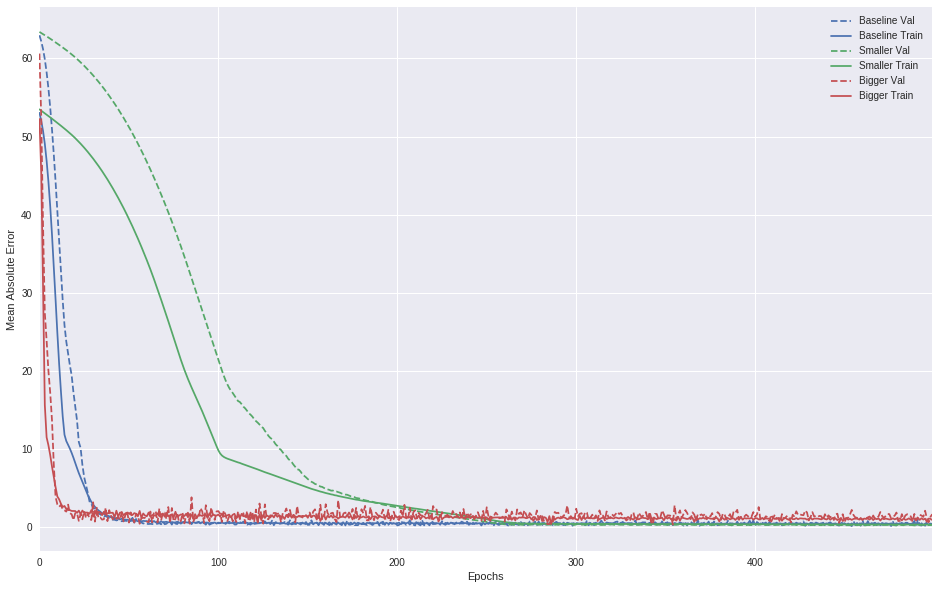

In [9]:
import matplotlib.pyplot as plt



def plot_history(histories, key='mean_absolute_error'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

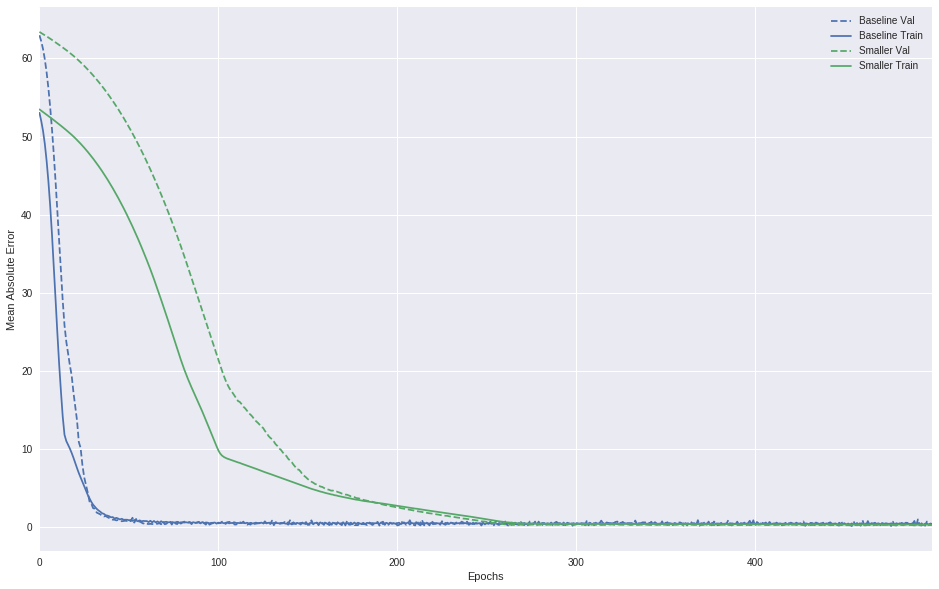

In [10]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history)])

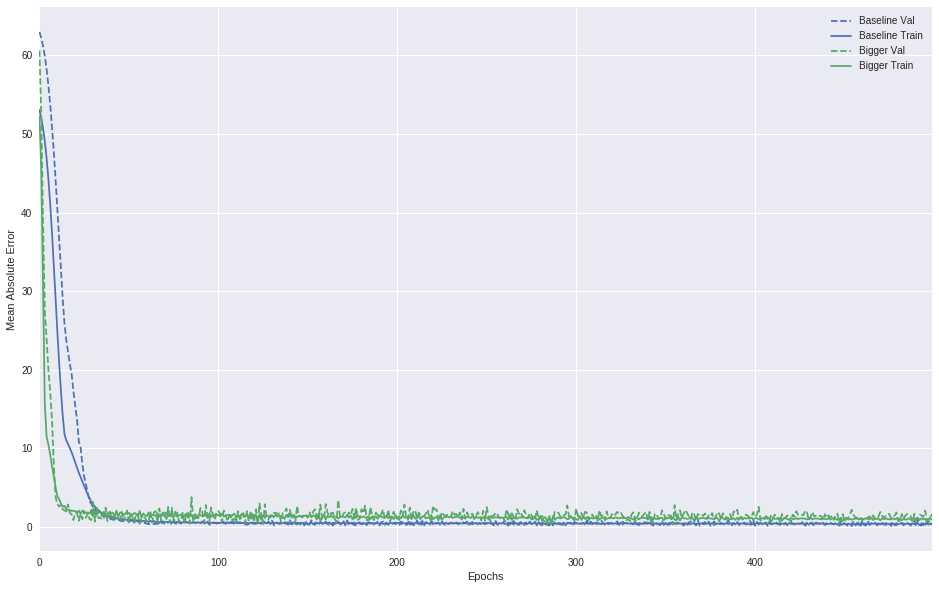

In [11]:
plot_history([('baseline', baseline_history),
              ('bigger', bigger_history)])

In [12]:
l2_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1)
])

optimizer = tf.train.RMSPropOptimizer(0.001)

l2_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=500,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 4961 samples, validate on 1000 samples
Epoch 1/500
 - 0s - loss: 4138.6878 - mean_absolute_error: 53.1749 - val_loss: 4316.1487 - val_mean_absolute_error: 63.0677
Epoch 2/500
 - 0s - loss: 3977.9626 - mean_absolute_error: 52.0389 - val_loss: 4191.5356 - val_mean_absolute_error: 62.2131
Epoch 3/500
 - 0s - loss: 3793.6360 - mean_absolute_error: 50.6979 - val_loss: 4044.9875 - val_mean_absolute_error: 61.1901
Epoch 4/500
 - 0s - loss: 3575.7264 - mean_absolute_error: 49.0663 - val_loss: 3867.0931 - val_mean_absolute_error: 59.9266
Epoch 5/500
 - 0s - loss: 3318.5498 - mean_absolute_error: 47.0977 - val_loss: 3653.3612 - val_mean_absolute_error: 58.3687
Epoch 6/500
 - 0s - loss: 3020.0466 - mean_absolute_error: 44.7060 - val_loss: 3407.7334 - val_mean_absolute_error: 56.5180
Epoch 7/500
 - 0s - loss: 2688.2945 - mean_absolute_error: 41.9145 - val_loss: 3130.7732 - val_mean_absolute_error: 54.3454
Epoch 8/500
 - 0s - loss: 2329.4563 - mean_absolute_error: 38.7097 - val_loss: 2829.

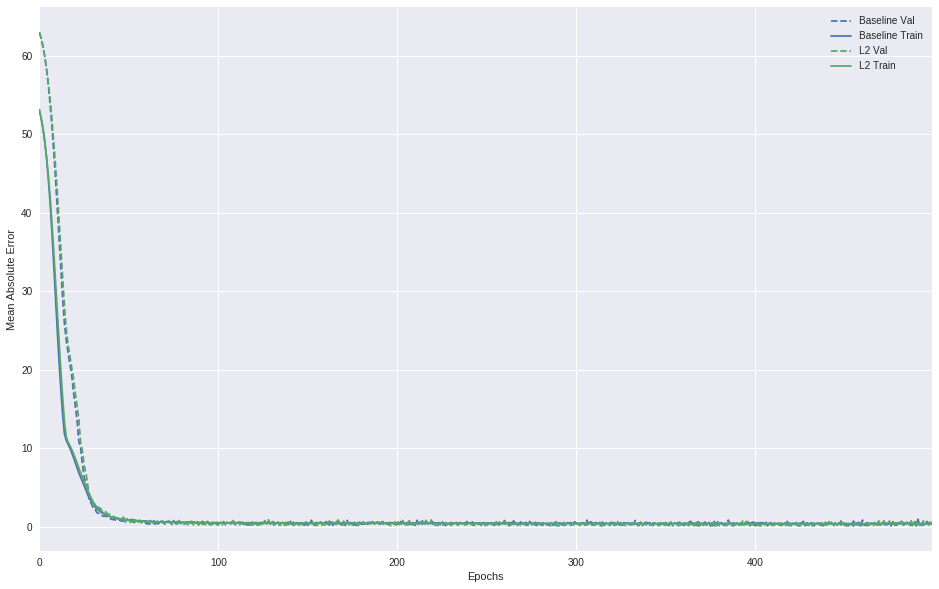

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])


In [16]:
dpt_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

optimizer = tf.train.RMSPropOptimizer(0.001)

dpt_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                epochs=500,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 4961 samples, validate on 1000 samples
Epoch 1/500
 - 0s - loss: 4091.5246 - mean_absolute_error: 52.9205 - val_loss: 4287.4255 - val_mean_absolute_error: 62.9149
Epoch 2/500
 - 0s - loss: 3919.8347 - mean_absolute_error: 51.7106 - val_loss: 4159.2061 - val_mean_absolute_error: 62.0382
Epoch 3/500
 - 0s - loss: 3724.7507 - mean_absolute_error: 50.2604 - val_loss: 3999.9368 - val_mean_absolute_error: 60.9261
Epoch 4/500
 - 0s - loss: 3490.7670 - mean_absolute_error: 48.4179 - val_loss: 3800.8351 - val_mean_absolute_error: 59.5050
Epoch 5/500
 - 0s - loss: 3205.6518 - mean_absolute_error: 46.1402 - val_loss: 3571.4292 - val_mean_absolute_error: 57.8094
Epoch 6/500
 - 0s - loss: 2885.6331 - mean_absolute_error: 43.3763 - val_loss: 3301.5576 - val_mean_absolute_error: 55.7415
Epoch 7/500
 - 0s - loss: 2519.4113 - mean_absolute_error: 40.0755 - val_loss: 2998.9600 - val_mean_absolute_error: 53.3108
Epoch 8/500
 - 0s - loss: 2145.6665 - mean_absolute_error: 36.3937 - val_loss: 2671.

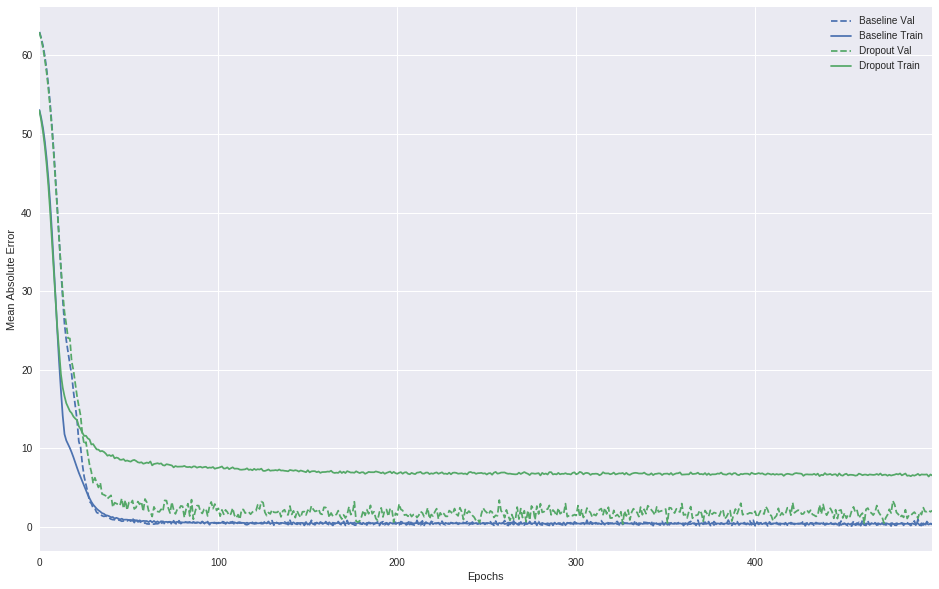

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])
